<a href="https://colab.research.google.com/github/Shaunak-Mukherjee/ECE-58000-Optimization-Methods-for-Systems-And-Control/blob/Optimization-Algorithms/Steepest_Descent_Algorithm_Example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 2: alpha = 0.08336, phi_val = 3.06756, x_iter = [-0.06572546  0.06535223], f(x_iter) = 3.07983
Iteration 3: alpha = 3.21703, phi_val = 0.32200, x_iter = [ 0.6574037  -0.64336879], f(x_iter) = -0.51331
Iteration 4: alpha = 0.08333, phi_val = -0.51390, x_iter = [ 0.65046662 -0.65046579], f(x_iter) = -0.51390
Iteration 5: alpha = 0.03494, phi_val = -0.51391, x_iter = [ 0.65042004 -0.65041956], f(x_iter) = -0.51391


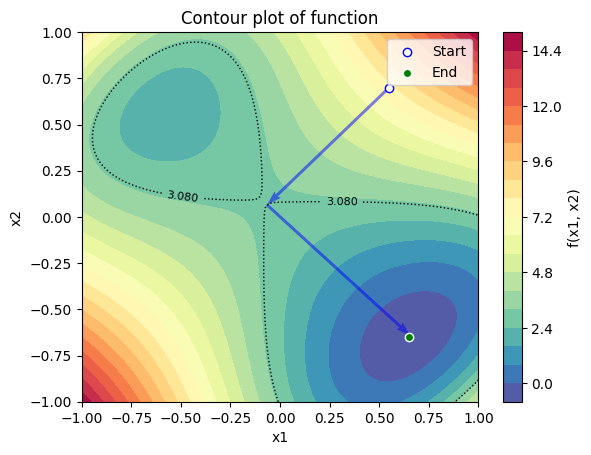

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x1, x2):
    return (x2 - x1)**4 + 12*x1*x2 - x1 + x2 + 3

# Define the gradient of the function
def grad(x1, x2):
    df_dx1 = -4 * (x2 - x1)**3 + 12 * x2 - 1
    df_dx2 = 4 * (x2 - x1)**3 + 12 * x1 + 1
    return np.array([df_dx1, df_dx2])

# Define the function to evaluate phi
def phi(alpha, x_iter):
    grad_vals = grad(x_iter[0], x_iter[1])
    new_x1 = x_iter[0] - alpha * grad_vals[0]
    new_x2 = x_iter[1] - alpha * grad_vals[1]
    return f(new_x1, new_x2)

# Golden section search for finding optimal alpha
def golden_section_search(phi, x_iter, a=0, b=5, rho=(3 - np.sqrt(5)) / 2, uncertainty=1e-4):
    a1 = a + rho * (b - a)
    b1 = a + (1 - rho) * (b - a)
    phi_a1 = phi(a1, x_iter)
    phi_b1 = phi(b1, x_iter)

    while (b - a) > uncertainty:
        if phi_a1 < phi_b1:
            b = b1
            b1 = a1
            phi_b1 = phi_a1
            a1 = a + rho * (b - a)
            phi_a1 = phi(a1, x_iter)
        else:
            a = a1
            a1 = b1
            phi_a1 = phi_b1
            b1 = a + (1 - rho) * (b - a)
            phi_b1 = phi(b1, x_iter)

    return (a1 + b1) / 2

# Steepest descent algorithm implementation
def steepest_descent(f, grad, x_init, tol=1e-4, max_iter=100):
    x_iter = np.array(x_init, dtype=float)
    x_iters = [x_iter.copy()]
    k_iter = 1
    f_level_set = []
    while np.linalg.norm(grad(x_iter[0], x_iter[1])) > tol and k_iter < max_iter:
        alpha = golden_section_search(phi, x_iter)
        grad_vals = grad(x_iter[0], x_iter[1])
        x_iter -= alpha * grad_vals
        x_iters.append(x_iter.copy())
        k_iter += 1
        f_level_set.append(f(*x_iter))
        phi_val = phi(alpha, x_iter)
        print(f'Iteration {k_iter}: alpha = {alpha:.5f}, phi_val = {phi_val:.5f}, x_iter = {x_iter}, f(x_iter) = {f(*x_iter):.5f}')

    return x_iters, f_level_set

# Plot function contours and path of optimization
def plot_contours_and_path(x1_range, x2_range, f, x_iters, f_level_set):
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    f_values = f(x1_grid, x2_grid)

    plt.figure()
    plt.contourf(x1_grid, x2_grid, f_values, levels=20, cmap='Spectral_r')
    plt.colorbar(label='f(x1, x2)')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Contour plot of function')

    x_iters = np.array(x_iters)
    plt.scatter(x_iters[0, 0], x_iters[0, 1], color='w', edgecolor='b', label='Start', zorder=5)
    plt.scatter(x_iters[-1, 0], x_iters[-1, 1], color='g', edgecolor='w', label='End', zorder=5)

    for i in range(len(x_iters) - 1):
        plt.quiver(x_iters[i, 0], x_iters[i, 1],
                   x_iters[i+1, 0] - x_iters[i, 0], x_iters[i+1, 1] - x_iters[i, 1],
                   angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.5)

    # Adding level set function values
    level_set_levels = sorted(list(set(f_level_set)))
    cont = plt.contour(x1_grid, x2_grid, f_values, levels=level_set_levels, colors='black', linestyles='dotted', linewidths=1)
    plt.clabel(cont, inline=True, fontsize=8)
    plt.legend()
    plt.show()

# Main function to run the steepest descent algorithm
def main():
    # Define the range of x1 and x2
    x1_range = np.linspace(-1, 1, 100)
    x2_range = np.linspace(-1, 1, 100)

    # Initial guess provided
    x_init = [0.55, 0.7]

    # Run the steepest descent algorithm
    x_iters, f_level_set = steepest_descent(f, grad, x_init)

    # Plot contours and optimization path
    plot_contours_and_path(x1_range, x2_range, f, x_iters, f_level_set)

if __name__ == '__main__':
    main()
